<a href="https://colab.research.google.com/github/nik8233/addeclip/blob/main/anamoly_detection_in_etherum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the dataset
df = pd.read_csv('transaction_data.csv')

# Drop unnecessary columns
df = df.drop(columns=['Unnamed: 0', 'Index', 'Address'])

# Separate features (X) and target (y)
X = df.drop(columns=['FLAG'])  # 'FLAG' is assumed to be the anomaly label
y = df['FLAG']

# Encode categorical features
categorical_columns = X.select_dtypes(include=['object']).columns
for col in categorical_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [ ]:
# Fill missing values with the mean of each column
X_train = pd.DataFrame(X_train).fillna(X_train.mean())
X_test = pd.DataFrame(X_test).fillna(X_train.mean())  # Use training mean to avoid data leakage

# Convert back to NumPy arrays if necessary
X_train = X_train.values
X_test = X_test.values


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the dataset
df = pd.read_csv('transaction_data.csv')

# Drop unnecessary columns
df = df.drop(columns=['Unnamed: 0', 'Index', 'Address'])

# Separate features (X) and target (y)
X = df.drop(columns=['FLAG'])  # Assuming 'FLAG' is the target column
y = df['FLAG']

# Encode categorical features
categorical_columns = X.select_dtypes(include=['object']).columns
for col in categorical_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to DataFrames for easier handling of NaNs
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

# Fill missing values with the mean of each column
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_train.mean())  # Use training mean to avoid data leakage

# Reset indices of y_train and y_test to ensure they align with X_train and X_test
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train SVM model
svm_model = SVC(kernel='rbf', gamma='scale', random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Calculate SVM metrics
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm, average='binary')
svm_recall = recall_score(y_test, y_pred_svm, average='binary')
svm_f1 = f1_score(y_test, y_pred_svm, average='binary')

In [ ]:
from sklearn.neural_network import MLPClassifier

# Train MLP model
mlp_model = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)
mlp_model.fit(X_train, y_train)
y_pred_mlp = mlp_model.predict(X_test)

# Calculate MLP metrics
mlp_accuracy = accuracy_score(y_test, y_pred_mlp)
mlp_precision = precision_score(y_test, y_pred_mlp, average='binary')
mlp_recall = recall_score(y_test, y_pred_mlp, average='binary')
mlp_f1 = f1_score(y_test, y_pred_mlp, average='binary')


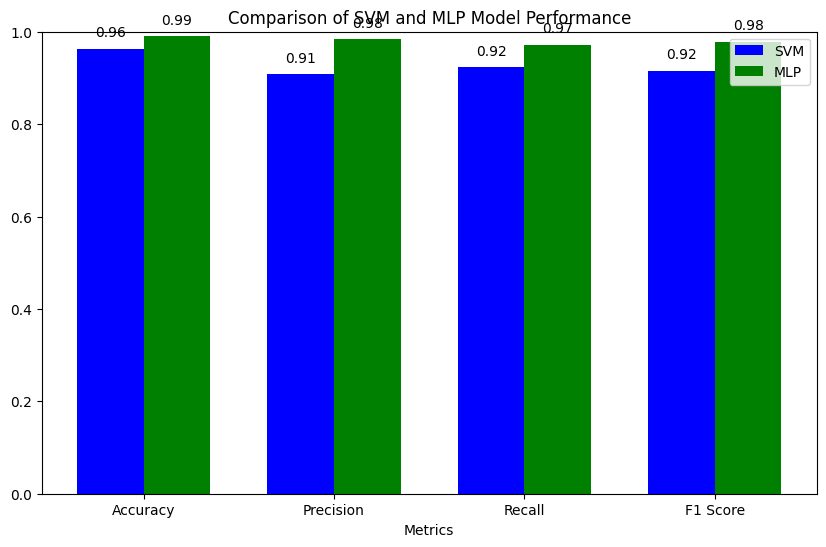

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics data
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
svm_scores = [svm_accuracy, svm_precision, svm_recall, svm_f1]
mlp_scores = [mlp_accuracy, mlp_precision, mlp_recall, mlp_f1]

# Plotting the metrics for comparison
x = np.arange(len(metrics))  # Label locations
width = 0.35  # Width of bars

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, svm_scores, width, label='SVM', color='blue')
bars2 = ax.bar(x + width/2, mlp_scores, width, label='MLP', color='green')

# Labeling and formatting
ax.set_xlabel('Metrics')
ax.set_title('Comparison of SVM and MLP Model Performance')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylim(0, 1)  # Set y-axis limit to 0-1 for percentage representation
ax.legend()

# Display values on top of the bars
for bar in bars1 + bars2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f"{yval:.2f}", ha='center', va='bottom')

plt.show()


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the dataset
df = pd.read_csv('transaction_data.csv')

# Drop unnecessary columns
df = df.drop(columns=['Unnamed: 0', 'Index', 'Address'])

# Encode categorical features
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))

# Separate features (X) and target (y)
X = df.drop(columns=['FLAG'])  # Assuming 'FLAG' is the target column if it exists

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
# Fill missing values with the mean of each column
X_filled = pd.DataFrame(X_scaled).fillna(pd.DataFrame(X_scaled).mean())

# Convert back to a NumPy array if needed
X_filled = X_filled.values




In [ ]:
# Initialize Isolation Forest model
isolation_forest = IsolationForest(contamination=0.05, random_state=42)
isolation_forest.fit(X_filled)

# Predict anomalies (1 = normal, -1 = anomaly)
anomaly_labels = isolation_forest.predict(X_filled)
df['Anomaly'] = anomaly_labels


In [ ]:
# Drop rows with missing values
X_cleaned = pd.DataFrame(X_scaled).dropna()

# Convert back to a NumPy array
X_cleaned = X_cleaned.values


In [ ]:
import numpy as np

# Check for missing values in the scaled data
print("Are there any NaNs in X_scaled?", np.isnan(X_scaled).any())
print("Number of NaNs in each column:\n", np.isnan(X_scaled).sum(axis=0))



Are there any NaNs in X_scaled? True
Number of NaNs in each column:
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0 829 829 829 829 829 829 829 829 829 829 829 829 829 829
 829 829 829 829 829 829 829 829 829   0   0]


In [ ]:
# Fill NaN values with the mean of each column
X_scaled = pd.DataFrame(X_scaled).fillna(pd.DataFrame(X_scaled).mean())

# Convert back to a NumPy array if needed
X_scaled = X_scaled.values


In [ ]:
from sklearn.ensemble import IsolationForest

# Initialize Isolation Forest model
isolation_forest = IsolationForest(contamination=0.05, random_state=42)
isolation_forest.fit(X_scaled)

# Predict anomalies (1 = normal, -1 = anomaly)
anomaly_labels = isolation_forest.predict(X_scaled)
df['Anomaly'] = anomaly_labels


In [ ]:
# Count anomalies
num_anomalies = (df['Anomaly'] == -1).sum()

if num_anomalies > 0:
    print(f"Anomalies detected: {num_anomalies} transactions are flagged as anomalies.")
else:
    print("No anomalies detected.")


Anomalies detected: 491 transactions are flagged as anomalies.


Counting Anomalies:

The code checks the Anomaly column of the DataFrame df to identify anomalies, assuming that anomalies are flagged with a value of -1.
It calculates the number of anomalies using the expression (df['Anomaly'] == -1).sum(), which counts how many times the value -1 appears in the Anomaly column.
Conditional Check:

If there are any anomalies (num_anomalies > 0), it prints the number of anomalies detected: "Anomalies detected: 491 transactions are flagged as anomalies."
If no anomalies are detected, it prints: "No anomalies detected."
Output:
The output indicates that 491 transactions have been flagged as anomalies, which means there are 491 instances where the value in the Anomaly column is -1.

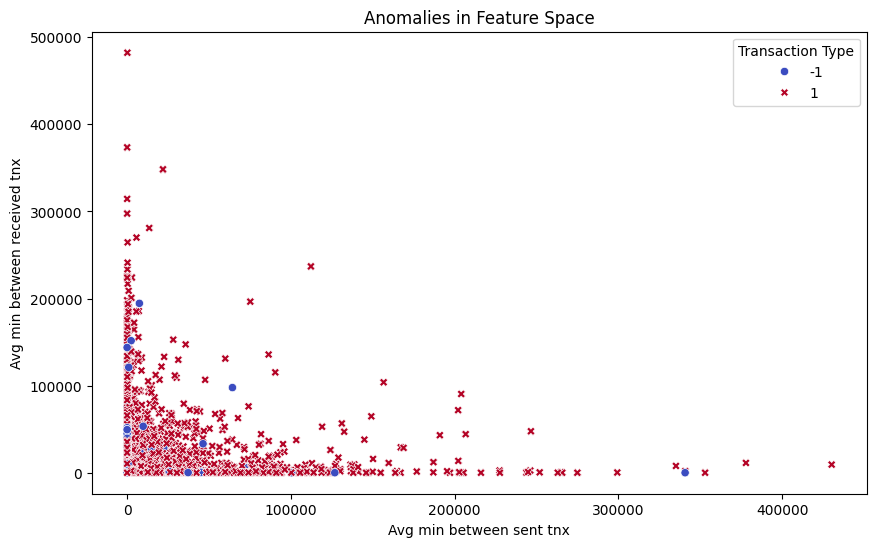

In [ ]:
# Select two features to plot
feature_x = 'Avg min between sent tnx'  # Replace with actual feature names
feature_y = 'Avg min between received tnx'  # Replace with actual feature names

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=feature_x, y=feature_y, hue='Anomaly', palette="coolwarm", style='Anomaly')
plt.title("Anomalies in Feature Space")
plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.legend(title="Transaction Type")
plt.show()



<ipython-input-25-ac30176cb6d6>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=counts, palette="coolwarm")


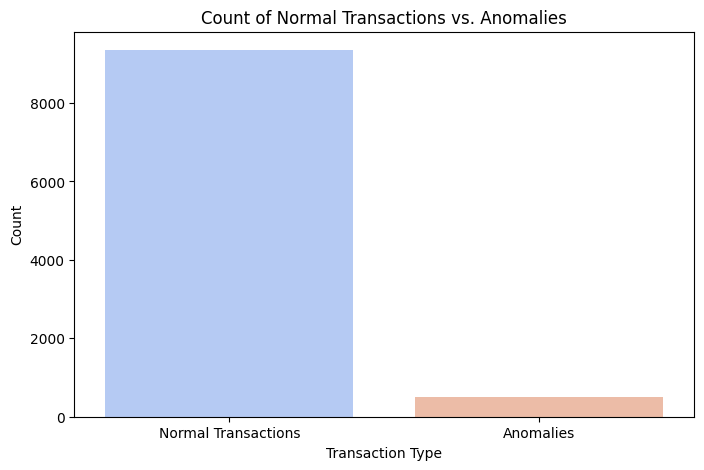

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of normal and anomalous transactions
normal_count = (df['Anomaly'] == 1).sum()
anomaly_count = (df['Anomaly'] == -1).sum()

# Data for plotting
counts = [normal_count, anomaly_count]
labels = ["Normal Transactions", "Anomalies"]

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=labels, y=counts, palette="coolwarm")
plt.title("Count of Normal Transactions vs. Anomalies")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.show()


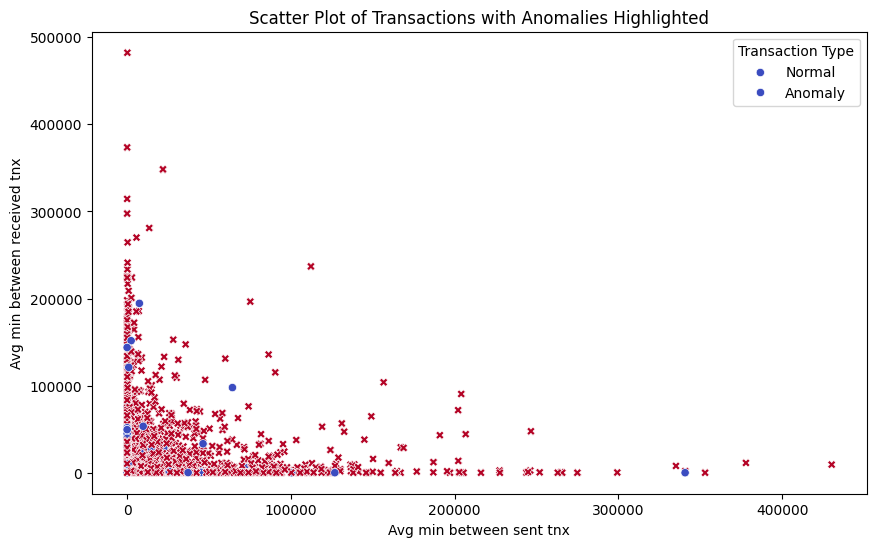

In [ ]:
# Select two features for the scatter plot (replace with relevant feature names)
feature_x = 'Avg min between sent tnx'  # Example feature; replace with actual feature
feature_y = 'Avg min between received tnx'  # Example feature; replace with actual feature

# Scatter plot with anomalies highlighted
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=feature_x, y=feature_y, hue='Anomaly', palette="coolwarm", style='Anomaly')
plt.title("Scatter Plot of Transactions with Anomalies Highlighted")
plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.legend(title="Transaction Type", labels=["Normal", "Anomaly"])
plt.show()


This code checks for anomalies in the dataset by inspecting the Anomaly column, counting how many transactions are flagged as anomalies (-1), and outputs the result. In this case, 491 transactions were flagged as anomalies, indicating potential outliers or irregular data points in the dataset.